In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import keras

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [40]:
df = pd.read_csv('training.csv')

In [ ]:
#Let's have a look at the dataset
df

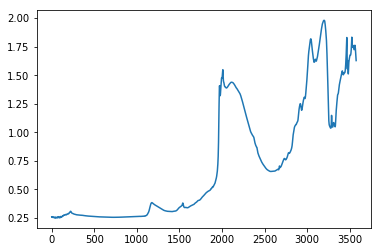

In [27]:
#looking at the plot of the mid-infrared absorbance measurements for random samples
plt.plot(np.arange(3577),np.squeeze(df.iloc[[4],1:3578].values))
plt.show()

In [ ]:
#Building an LSTM with return sequences to false might work
#We could also include the other inputs as a part of the final Dense layer

In [43]:
lstm_input = Input(shape = (3578,1), name = "lstm_input")
lstm_layer = keras.layers.CuDNNLSTM(4)(lstm_input)
pre_dense_layer = Dense(6, activation = 'relu')(lstm_layer)
secondary_input = Input(shape = (15,), name = "secondary_input")
concatenated_input = keras.layers.concatenate([pre_dense_layer,secondary_input])
dense_layer_1 = Dense(16, activation = 'relu')(concatenated_input)
dense_layer_2 = Dense(16, activation = 'relu')(dense_layer_1)
dense_layer_3 = Dense(16, activation = 'relu')(dense_layer_2)

dense_output = Dense(5, activation = 'linear', name = "dense_output")(dense_layer_3)

model = Model(inputs = [lstm_input, secondary_input], outputs = [dense_output])
model.compile(optimizer='adam', loss='mse')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_input (InputLayer)         (None, 3578, 1)      0                                            
__________________________________________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)        (None, 4)            112         lstm_input[0][0]                 
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 6)            30          cu_dnnlstm_6[0][0]               
__________________________________________________________________________________________________
secondary_input (InputLayer)    (None, 15)           0                                            
__________________________________________________________________________________________________
concatenat

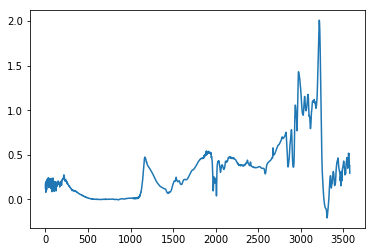

array([[-0.29574924, -0.04133638, -1.12936595,  0.35325838,  1.26974781],
       [-0.38744188, -0.23155201, -1.53153828, -0.26402306,  1.69220923],
       [-0.24860129, -0.22463507, -0.25955137,  0.06415188,  2.09183489],
       ..., 
       [-0.44644913, -0.38026604, -0.40919689,  4.36949458, -0.40487401],
       [-0.49301858, -0.41830917, -0.19408146,  2.53327764, -0.56853023],
       [-0.20897388, -0.17967502, -0.54948957,  3.97099643, -0.42009784]])

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_lstm_input = np.squeeze(df.iloc[:,1:3579].values)
X_lstm_input = sc.fit_transform(X_lstm_input)
plt.plot(np.arange(3578),X_lstm_input[4])
plt.show()

X_lstm_input = X_lstm_input.reshape((1157,3578,1))

sc2 = StandardScaler()

df.iloc[:,3579:3594] = sc2.fit_transform(df.iloc[:,3579:3594])

X_secondary_input = np.squeeze(df.iloc[:,3579:3594].values)


y_train = df.iloc[:,3595:3600].values
y_train = y_train.reshape((1157,5))
y_train

In [52]:
model.fit([X_lstm_input, X_secondary_input],y_train, epochs = 100, batch_size = 1157)

Epoch 1/100
1157/1157 [==============================] - 1s 442us/step - loss: 0.4404
Epoch 2/100
1157/1157 [==============================] - 1s 440us/step - loss: 0.4401
Epoch 3/100
1157/1157 [==============================] - 1s 442us/step - loss: 0.4398
Epoch 4/100
1157/1157 [==============================] - 1s 447us/step - loss: 0.4396
Epoch 5/100
1157/1157 [==============================] - 1s 435us/step - loss: 0.4393
Epoch 6/100
1157/1157 [==============================] - 1s 438us/step - loss: 0.4390
Epoch 7/100
1157/1157 [==============================] - 1s 440us/step - loss: 0.4387
Epoch 8/100
1157/1157 [==============================] - 1s 435us/step - loss: 0.4384
Epoch 9/100
1157/1157 [==============================] - 1s 437us/step - loss: 0.4382
Epoch 10/100
1157/1157 [==============================] - 1s 438us/step - loss: 0.4379
Epoch 11/100
1157/1157 [==============================] - 1s 474us/step - loss: 0.4376
Epoch 12/100
1157/1157 [============================

Epoch 96/100
1157/1157 [==============================] - 0s 400us/step - loss: 0.4158
Epoch 97/100
1157/1157 [==============================] - 0s 405us/step - loss: 0.4156
Epoch 98/100
1157/1157 [==============================] - 0s 403us/step - loss: 0.4154
Epoch 99/100
1157/1157 [==============================] - 0s 403us/step - loss: 0.4152
Epoch 100/100
1157/1157 [==============================] - 1s 434us/step - loss: 0.4150


In [53]:
model.predict([X_lstm_input,X_secondary_input], batch_size = 1157)

array([[-0.33656108,  0.22133252, -0.01249484,  0.30109459,  0.61021918],
       [-0.33999515,  0.2192584 , -0.02034412,  0.31638521,  0.59916759],
       [-0.25345072,  0.29624149,  0.03270569,  0.34006453,  0.83217204],
       ..., 
       [-0.19065613, -0.02585474, -0.40235624,  1.71793211, -0.93685734],
       [-0.40901431, -0.02596436, -0.50649023,  0.91105545, -0.76724321],
       [ 0.51335061, -0.0450118 , -0.16865501,  2.90754509, -1.04952466]], dtype=float32)

In [8]:
test = pd.read_csv('sorted_test.csv')
test

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,...,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth
0,09gt9UK5,0.210899,0.209221,0.207645,0.208714,0.211972,0.213562,0.211267,0.208248,0.207341,...,-0.009394,0.197885,-0.622545,-0.548238,-0.637681,-0.413306,-0.130139,0.154013,-0.033905,Subsoil
1,0BVvxJ6a,0.191650,0.184120,0.177070,0.180624,0.192343,0.197502,0.187655,0.175447,0.172639,...,-0.277944,-0.851643,-0.792000,-1.058442,-0.792961,-0.785786,-0.588855,0.106200,0.559694,Subsoil
2,0KbdgApg,0.083966,0.074740,0.065596,0.069924,0.085145,0.092527,0.080625,0.064768,0.060597,...,-0.443809,-0.628839,-0.754909,-0.926716,-0.865424,-0.607359,-0.334013,-0.021042,0.182431,Topsoil
3,0MnuuduB,0.345962,0.338567,0.331786,0.336948,0.350820,0.356365,0.345285,0.332233,0.328589,...,-0.758853,-0.961080,-0.729455,-0.780148,-0.716356,-0.552923,-0.079171,0.394936,0.774477,Topsoil
4,0PcIsF9z,0.239019,0.232611,0.226266,0.229921,0.241821,0.247756,0.239242,0.227977,0.224762,...,-1.228289,1.156914,-0.696727,0.080705,0.118012,-0.920363,-0.266055,1.612625,1.199048,Subsoil
5,0ShTFLYJ,0.073609,0.066477,0.059334,0.063480,0.076672,0.082762,0.072946,0.060671,0.057126,...,1.005241,1.213789,-0.087273,-0.307978,0.035197,0.041331,-0.215087,-0.259524,0.310290,Topsoil
6,0XZh9jka,0.477678,0.472592,0.467762,0.470966,0.480080,0.483794,0.476832,0.468728,0.466117,...,-1.988469,-0.381654,-1.161455,-0.474026,-1.248447,-1.218246,4.253143,2.180246,2.149193,Subsoil
7,0Y7Wegri,0.157858,0.150585,0.144036,0.147652,0.158833,0.163462,0.153664,0.141811,0.139106,...,0.011304,-0.605455,-0.842909,-1.359926,-0.863354,-0.751512,-0.588855,0.106200,0.559694,Topsoil
8,0dTqplIM,0.386384,0.383351,0.381703,0.388792,0.397275,0.395416,0.385422,0.379457,0.378825,...,0.309059,1.059262,-0.717091,-0.876623,-0.720497,-0.756552,-0.232076,0.618605,0.860709,Topsoil
9,0lNiZicC,0.050984,0.045103,0.039556,0.043411,0.054552,0.059218,0.050379,0.039956,0.037045,...,0.981412,1.074459,0.220364,0.217069,0.409938,0.224294,-0.503908,-0.259524,0.310290,Subsoil


In [46]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_lstm_input_test = np.squeeze(test.iloc[:,1:3579].values)
X_lstm_input_test = sc.fit_transform(X_lstm_input_test)
X_lstm_input_test = X_lstm_input_test.reshape((727,3578,1))

test.iloc[:,3579:3594] = sc2.fit_transform(test.iloc[:,3579:3594])
X_secondary_input_test = np.squeeze(test.iloc[:,3579:3594].values)

X_secondary_input_test.shape

(727, 15)

In [54]:
test_results = model.predict([X_lstm_input_test, X_secondary_input_test], batch_size = 727)
np.savetxt('test_results9.csv', test_results, delimiter = ',')

In [ ]:
history.history.keys